In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

plotly.tools.set_credentials_file(username='amr7', api_key='4gj9vxlD7C63cCRCaRdU')

#iMac
#directory = '/Users/alexreblando/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/ebs/usable_data'

#laptop
rq_directory = '/Users/alexreblando/Documents/GitHub/data_analysis_ebs/recall_scores'

filenames = glob.glob(rq_directory+ '/*.csv')

rq_dfs = []

for filename in filenames:
    rq_dfs.append(pd.read_csv(filename))
    


In [2]:
rq_dfs[1]

,participant,story,schema,1,2,3,4,5,6,7,8
0,030119_p1,12,Social,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,030119_p3,12,Location,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,030419_p2,12,Location,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0
3,030519_p1,12,Location,1.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0
4,030719_p2,12,Social,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
5,030819_p1,12,Location,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,031219_p1,12,Social,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0
7,031219_p2,12,Social,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
8,031319_p1,12,Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,031319_p2,12,Location,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0


In [3]:
#average of each question for each story
l_rq = len(rq_dfs)
avg_q = ['story', 'Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']
#avg_q = []
for s in range(l_rq):
    this_story = [str(int(rq_dfs[s]['story'].iloc[0]))]
    for i in range(1, 9):
        this_story.append(round(rq_dfs[s][str(i)].mean(),2))
    avg_q = np.vstack((avg_q, this_story))
    
np.savetxt("avg_q_values.csv", avg_q, delimiter=",", fmt="%s")

s_avg_q = np.delete(avg_q, (0), axis=0)
s_avg_q = np.delete(s_avg_q, (0), axis=1)
new_avg_q = s_avg_q.astype(np.float)

[['story' 'Q1' 'Q2' 'Q3' 'Q4' 'Q5' 'Q6' 'Q7' 'Q8']
 ['11' '1.2' '1.5' '1.5' '1.9' '0.9' '1.8' '1.8' '2.0']
 ['12' '1.18' '1.27' '1.73' '1.64' '1.55' '1.91' '1.64' '1.82']
 ['13' '0.33' '1.33' '1.0' '1.11' '0.67' '1.33' '1.56' '2.0']
 ['14' '0.57' '1.29' '0.86' '1.14' '1.43' '1.88' '1.62' '2.0']
 ['21' '1.0' '0.62' '1.0' '1.38' '1.62' '0.75' '2.0' '1.75']
 ['22' '0.8' '1.4' '1.3' '1.4' '0.4' '0.5' '1.5' '1.1']
 ['23' '1.0' '1.2' '1.0' '1.3' '1.8' '1.1' '1.9' '2.0']
 ['24' '1.33' '1.58' '0.75' '0.5' '1.33' '1.83' '1.83' '1.83']
 ['31' '1.22' '0.44' '0.78' '1.78' '0.67' '1.0' '1.22' '1.78']
 ['32' '1.1' '0.8' '1.1' '0.8' '1.8' '1.3' '1.1' '1.0']
 ['33' '0.18' '0.64' '1.09' '1.27' '1.82' '1.18' '1.27' '1.0']
 ['34' '0.8' '0.4' '0.5' '1.0' '1.0' '2.0' '0.8' '1.3']
 ['41' '0.91' '0.91' '1.55' '1.82' '1.91' '1.73' '1.64' '1.27']
 ['42' '1.22' '0.78' '1.56' '0.33' '1.78' '2.0' '1.89' '2.0']
 ['43' '0.64' '1.36' '1.55' '1.73' '0.45' '1.36' '1.27' '1.27']
 ['44' '0.56' '0.78' '0.56' '1.22' '1.67

[Text(159.0, 0.5, 'story'), Text(0.5, 69.0, 'question')]

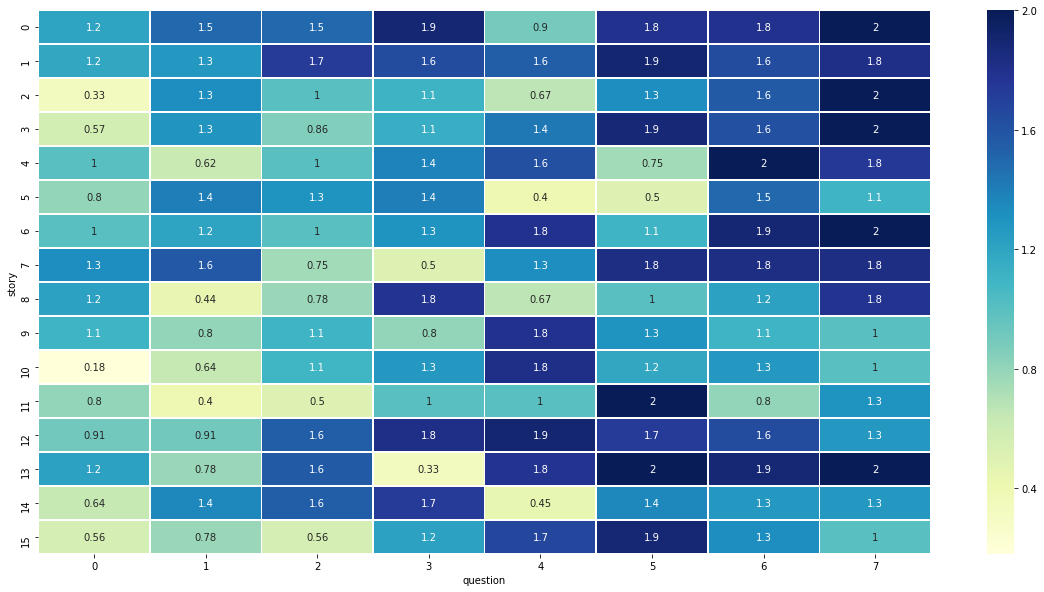

In [4]:
#plot the avg values in a heatmap

print(avg_q)
plt.figure(figsize = (20,10))

ax = sns.heatmap(new_avg_q, linewidths=.5, cmap="YlGnBu", xticklabels=1, yticklabels=1, annot=True)
ax.set(xlabel='question', ylabel='story')



In [5]:
#average of each question for each story for either location or social primed schema
loc_avg_q = ['story', 'Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']
soc_avg_q = ['story', 'Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']
#avg_q = []

#location
for s in range(l_rq):
    this_story = [str(int(rq_dfs[s]['story'].iloc[0]))]
    count = 0
    these_ones = rq_dfs[s].loc[rq_dfs[s]['schema'] == 'Location']
    for i in range(1, 9):
        this_story.append(round(these_ones[str(i)].mean(),2))
    loc_avg_q = np.vstack((loc_avg_q, this_story))
    
np.savetxt("loc_avg_q_values.csv", loc_avg_q, delimiter=",", fmt="%s")

#social
for s in range(l_rq):
    this_story = [str(int(rq_dfs[s]['story'].iloc[0]))]
    count = 0
    these_ones = rq_dfs[s].loc[rq_dfs[s]['schema'] == 'Social']
    for i in range(1, 9):
        this_story.append(round(these_ones[str(i)].mean(),2))
    soc_avg_q = np.vstack((soc_avg_q, this_story))
    
np.savetxt("soc_avg_q_values.csv", soc_avg_q, delimiter=",", fmt="%s")

#prepare matrices for heatmap
##location
loc_s_avg_q = np.delete(loc_avg_q, (0), axis=0)
loc_s_avg_q = np.delete(loc_s_avg_q, (0), axis=1)
loc_new_avg_q = loc_s_avg_q.astype(np.float)

soc_s_avg_q = np.delete(soc_avg_q, (0), axis=0)
soc_s_avg_q = np.delete(soc_s_avg_q, (0), axis=1)
soc_new_avg_q = soc_s_avg_q.astype(np.float)

In [6]:
print('loc',loc_avg_q)
print(soc_avg_q)
print(avg_q)

loc [['story' 'Q1' 'Q2' 'Q3' 'Q4' 'Q5' 'Q6' 'Q7' 'Q8']
 ['11' '2.0' '1.0' '1.5' '1.5' '1.5' '1.5' '2.0' '2.0']
 ['12' '1.33' '1.5' '1.83' '1.67' '1.67' '2.0' '1.83' '1.83']
 ['13' '0.43' '1.43' '0.86' '1.29' '0.86' '1.14' '1.43' '2.0']
 ['14' '1.33' '2.0' '2.0' '2.0' '1.0' '2.0' '1.75' '2.0']
 ['21' '0.5' '1.0' '1.0' '1.5' '2.0' '0.5' '2.0' '2.0']
 ['22' '0.71' '1.43' '1.29' '1.43' '0.29' '0.43' '1.43' '1.0']
 ['23' '1.14' '0.86' '0.86' '1.14' '1.71' '1.0' '2.0' '2.0']
 ['24' '1.25' '1.5' '0.75' '0.5' '1.25' '1.75' '2.0' '2.0']
 ['31' '1.0' '0.29' '0.71' '1.71' '0.43' '0.86' '1.0' '1.71']
 ['32' '1.33' '0.67' '1.33' '1.0' '2.0' '1.33' '1.33' '0.67']
 ['33' '0.67' '1.33' '1.33' '2.0' '2.0' '1.0' '1.33' '1.33']
 ['34' '0.57' '0.57' '0.71' '1.43' '1.0' '2.0' '0.86' '1.14']
 ['41' '0.78' '1.0' '1.67' '1.78' '1.89' '1.78' '1.78' '1.44']
 ['42' '1.33' '1.0' '1.0' '0.33' '1.33' '2.0' '1.67' '2.0']
 ['43' '1.0' '1.0' '1.33' '2.0' '0.33' '0.0' '1.33' '1.33']
 ['44' '0.4' '1.2' '1.0' '1.2' '1.6'

In [7]:
#LOCATION
#get the performance for recall questions for the same schema in different stories
s1 = '11'
s2 = '12'
s3 = '13'
s4 = '14'
schema_type = 'Location'

for j in range(0, 17):
    if avg_q[j, 0] == s1:
        if schema_type == 'Location':
            this1 = avg_q[j, 1:5]
        if schema_type == 'Social':
            this1 = avg_q[j, 5:9]
    if avg_q[j, 0] == s2:
        if schema_type == 'Location':
            this2 = avg_q[j, 1:5]
        if schema_type == 'Social':
            this2 = avg_q[j, 5:9]
    if avg_q[j, 0] == s3:
        if schema_type == 'Location':
            this3 = avg_q[j, 1:5]
        if schema_type == 'Social':
            this3 = avg_q[j, 5:9]
    if avg_q[j, 0] == s4:
        if schema_type == 'Location':
            this4 = avg_q[j, 1:5]
        if schema_type == 'Social':
            this4 = avg_q[j, 5:9]

schema_q_avgs = []
for i in range(0, 4):
    a1 = this1[i]
    a2 = this2[i]
    a3 = this3[i]
    a4 = this4[i]
    mean1 = [a1,a2, a3, a4]
    schema_q_avgs.append(np.mean(np.array(mean1).astype(np.float)))
    
    
    
        
            

print(schema_q_avgs)

[0.82, 1.3475, 1.2725000000000002, 1.4475]


In [8]:
#LOCATION
#get the performance for recall questions for the same schema in different stories for LOCATION PRIMED PARTICIPANTS


for j in range(0, 17):
    if loc_avg_q[j, 0] == s1:
        if schema_type == 'Location':
            this4 = loc_avg_q[j, 1:5]
        if schema_type == 'Social':
            this4 = loc_avg_q[j, 5:9]
    if loc_avg_q[j, 0] == s2:
        if schema_type == 'Location':
            this5 = loc_avg_q[j, 1:5]
        if schema_type == 'Social':
            this5 = loc_avg_q[j, 5:9]
    if loc_avg_q[j, 0] == s3:
        if schema_type == 'Location':
            this6 = loc_avg_q[j, 1:5]
        if schema_type == 'Social':
            this6 = loc_avg_q[j, 5:9]
    if loc_avg_q[j, 0] == s4:
        if schema_type == 'Location':
            this7 = loc_avg_q[j, 1:5]
        if schema_type == 'Social':
            this7 = loc_avg_q[j, 5:9]

loc_schema_q_avgs = []
for i in range(0, 4):
    a1 = this4[i]
    a2 = this5[i]
    a3 = this6[i]
    a4 = this7[i]
    mean1 = [a1,a2, a3, a4]
    loc_schema_q_avgs.append(np.mean(np.array(mean1).astype(np.float)))
    
    
    
        
            

print(loc_schema_q_avgs)

[1.2725, 1.4825, 1.5475, 1.615]


In [9]:
#LOCATION
#get the performance for recall questions for the same schema in different stories for SOCIAL PRIMED PARTICIPANTS


for j in range(0, 17):
    if soc_avg_q[j, 0] == s1:
        if schema_type == 'Location':
            this4 = soc_avg_q[j, 1:5]
        if schema_type == 'Social':
            this4 = soc_avg_q[j, 5:9]
    if soc_avg_q[j, 0] == s2:
        if schema_type == 'Location':
            this5 = soc_avg_q[j, 1:5]
        if schema_type == 'Social':
            this5 = soc_avg_q[j, 5:9]
    if soc_avg_q[j, 0] == s3:
        if schema_type == 'Location':
            this6 = soc_avg_q[j, 1:5]
        if schema_type == 'Social':
            this6 = soc_avg_q[j, 5:9]
    if soc_avg_q[j, 0] == s4:
        if schema_type == 'Location':
            this7 = soc_avg_q[j, 1:5]
        if schema_type == 'Social':
            this7 = soc_avg_q[j, 5:9]

soc_schema_q_avgs = []
for i in range(0, 4):
    a1 = this4[i]
    a2 = this5[i]
    a3 = this6[i]
    a4 = this7[i]
    mean1 = [a1,a2, a3, a4]
    soc_schema_q_avgs.append(np.mean(np.array(mean1).astype(np.float)))
    
    
    
        
            

print(soc_schema_q_avgs)

[0.5, 1.0925, 1.15, 1.15]


[Text(159.0, 0.5, 'which mix'),
 Text(0.5, 69.0, 'question'),
 Text(0.5, 1.0, 'location')]

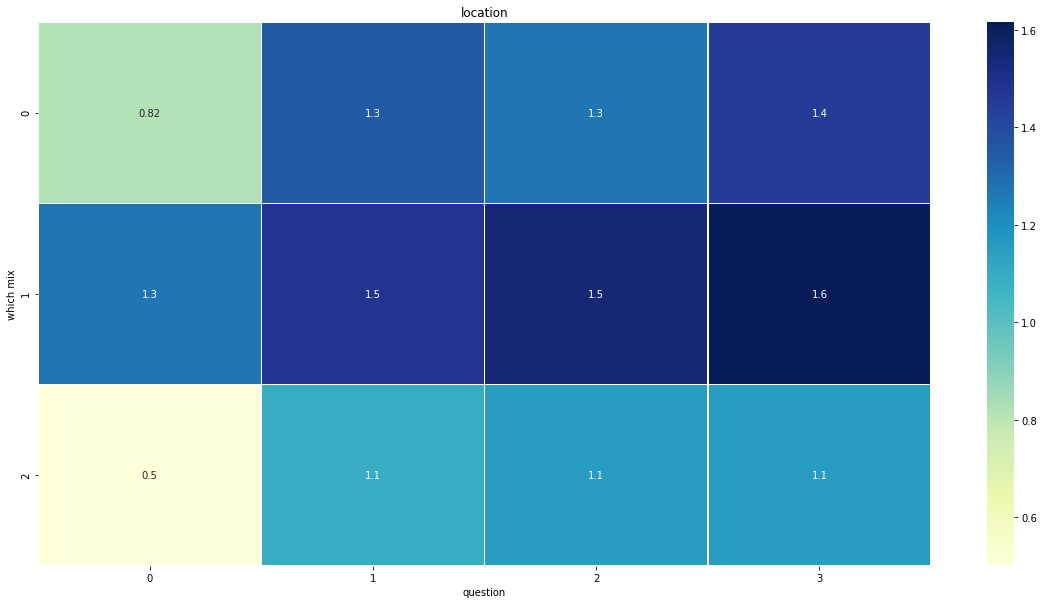

In [10]:
#LOCATION
dif_story_questions = np.vstack((schema_q_avgs, loc_schema_q_avgs))
dif_story_questions = np.vstack((dif_story_questions, soc_schema_q_avgs))
#plot the loc avg values in heatmaps
plt.figure(figsize = (20,10))

ax = sns.heatmap(dif_story_questions, linewidths=.5, cmap="YlGnBu", xticklabels=1, yticklabels=1, annot=True)
ax.set(xlabel='question', ylabel='which mix', title = "location")

In [15]:
#SOCIAL 1
#get the performance for recall questions for the same schema in different stories
s1 = '31'
s2 = '32'
s3 = '33'
s4 = '34'
schema_type = 'Location'

for j in range(0, 17):
    if avg_q[j, 0] == s1:
        if schema_type == 'Location':
            this1 = avg_q[j, 5:9]
        if schema_type == 'Social':
            this1 = avg_q[j, 1:5]
    if avg_q[j, 0] == s2:
        if schema_type == 'Location':
            this2 = avg_q[j, 5:9]
        if schema_type == 'Social':
            this2 = avg_q[j, 1:5]
    if avg_q[j, 0] == s3:
        if schema_type == 'Location':
            this3 = avg_q[j, 5:9]
        if schema_type == 'Social':
            this3 = avg_q[j, 1:5]
    if avg_q[j, 0] == s4:
        if schema_type == 'Location':
            this4 = avg_q[j, 5:9]
        if schema_type == 'Social':
            this4 = avg_q[j, 1:5]

schema_q_avgs = []
for i in range(0, 4):
    a1 = this1[i]
    a2 = this2[i]
    a3 = this3[i]
    a4 = this4[i]
    mean1 = [a1,a2, a3, a4]
    schema_q_avgs.append(np.mean(np.array(mean1).astype(np.float)))
    
    
    
        
            

print(schema_q_avgs)

[1.3225, 1.3699999999999999, 1.0975000000000001, 1.27]


In [16]:
#SOCIAL 2
#get the performance for recall questions for the same schema in different stories for LOCATION PRIMED PARTICIPANTS


for j in range(0, 17):
    if loc_avg_q[j, 0] == s1:
        if schema_type == 'Location':
            this4 = loc_avg_q[j, 5:9]
        if schema_type == 'Social':
            this4 = loc_avg_q[j, 1:5]
    if loc_avg_q[j, 0] == s2:
        if schema_type == 'Location':
            this5 = loc_avg_q[j, 5:9]
        if schema_type == 'Social':
            this5 = loc_avg_q[j, 1:5]
    if loc_avg_q[j, 0] == s3:
        if schema_type == 'Location':
            this6 = loc_avg_q[j, 5:9]
        if schema_type == 'Social':
            this6 = loc_avg_q[j, 1:5]
    if loc_avg_q[j, 0] == s4:
        if schema_type == 'Location':
            this7 = loc_avg_q[j, 5:9]
        if schema_type == 'Social':
            this7 = loc_avg_q[j, 1:5]

loc_schema_q_avgs = []
for i in range(0, 4):
    a1 = this4[i]
    a2 = this5[i]
    a3 = this6[i]
    a4 = this7[i]
    mean1 = [a1,a2, a3, a4]
    loc_schema_q_avgs.append(np.mean(np.array(mean1).astype(np.float)))
    
    
    
        
            

print(loc_schema_q_avgs)

[1.3575, 1.2974999999999999, 1.1300000000000001, 1.2125]


In [17]:
#SOCIAL 3
#get the performance for recall questions for the same schema in different stories for SOCIAL PRIMED PARTICIPANTS


for j in range(0, 17):
    if soc_avg_q[j, 0] == s1:
        if schema_type == 'Location':
            this4 = soc_avg_q[j, 5:9]
        if schema_type == 'Social':
            this4 = soc_avg_q[j, 1:5]
    if soc_avg_q[j, 0] == s2:
        if schema_type == 'Location':
            this5 = soc_avg_q[j, 5:9]
        if schema_type == 'Social':
            this5 = soc_avg_q[j, 1:5]
    if soc_avg_q[j, 0] == s3:
        if schema_type == 'Location':
            this6 = soc_avg_q[j, 5:9]
        if schema_type == 'Social':
            this6 = soc_avg_q[j, 1:5]
    if soc_avg_q[j, 0] == s4:
        if schema_type == 'Location':
            this7 = soc_avg_q[j, 5:9]
        if schema_type == 'Social':
            this7 = soc_avg_q[j, 1:5]

soc_schema_q_avgs = []
for i in range(0, 4):
    a1 = this4[i]
    a2 = this5[i]
    a3 = this6[i]
    a4 = this7[i]
    mean1 = [a1,a2, a3, a4]
    soc_schema_q_avgs.append(np.mean(np.array(mean1).astype(np.float)))
    
    
    
        
            

print(soc_schema_q_avgs)

[1.49, 1.51, 1.23, 1.4224999999999999]


[Text(159.0, 0.5, 'which mix'),
 Text(0.5, 69.0, 'question'),
 Text(0.5, 1.0, 'social questions')]

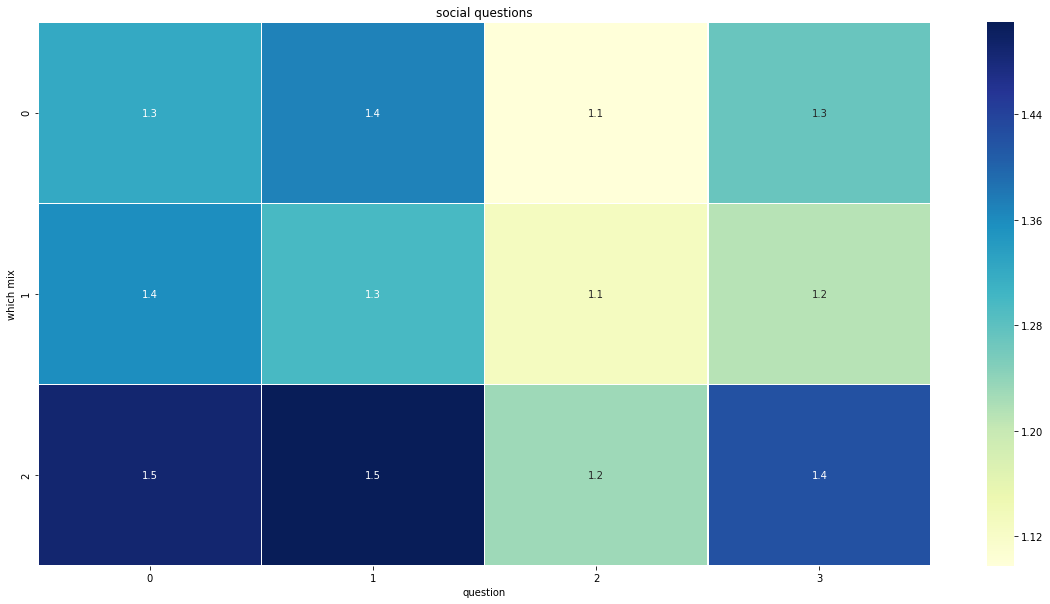

In [18]:
#SOCIAL 4
dif_story_questions = np.vstack((schema_q_avgs, loc_schema_q_avgs))
dif_story_questions = np.vstack((dif_story_questions, soc_schema_q_avgs))
#plot the loc avg values in heatmaps
plt.figure(figsize = (20,10))

ax = sns.heatmap(dif_story_questions, linewidths=.5, cmap="YlGnBu", xticklabels=1, yticklabels=1, annot=True)
ax.set(xlabel='question', ylabel='which mix', title = "social questions")

[Text(159.0, 0.5, 'story'),
 Text(0.5, 69.0, 'question'),
 Text(0.5, 1.0, 'location')]

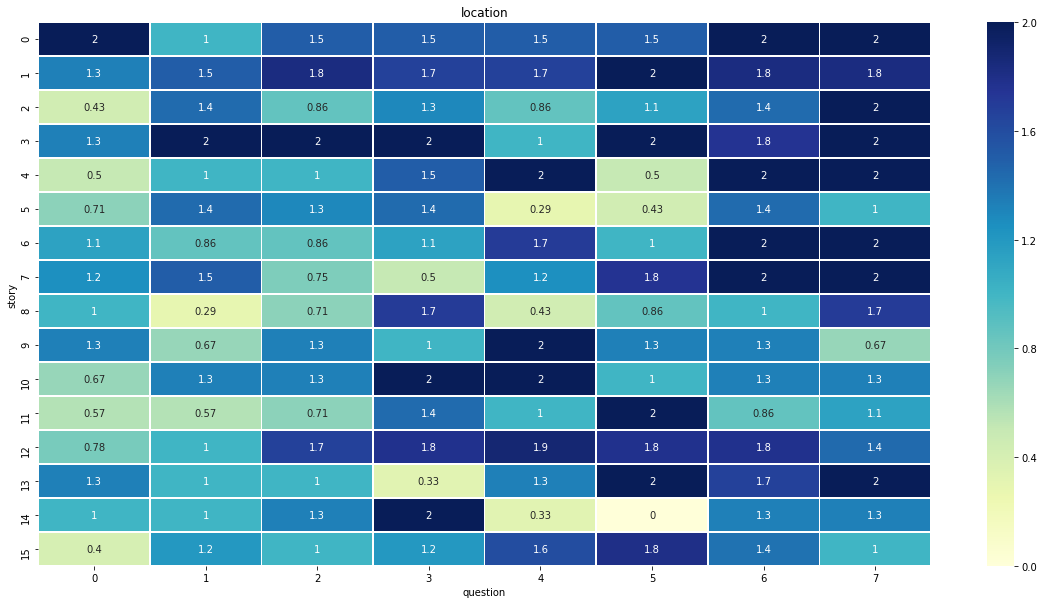

In [78]:
#plot the loc avg values in heatmaps
plt.figure(figsize = (20,10))

ax = sns.heatmap(loc_new_avg_q, linewidths=.5, cmap="YlGnBu", xticklabels=1, yticklabels=1, annot=True)
ax.set(xlabel='question', ylabel='story', title = "location")




[Text(159.0, 0.5, 'story'),
 Text(0.5, 69.0, 'question'),
 Text(0.5, 1.0, 'social')]

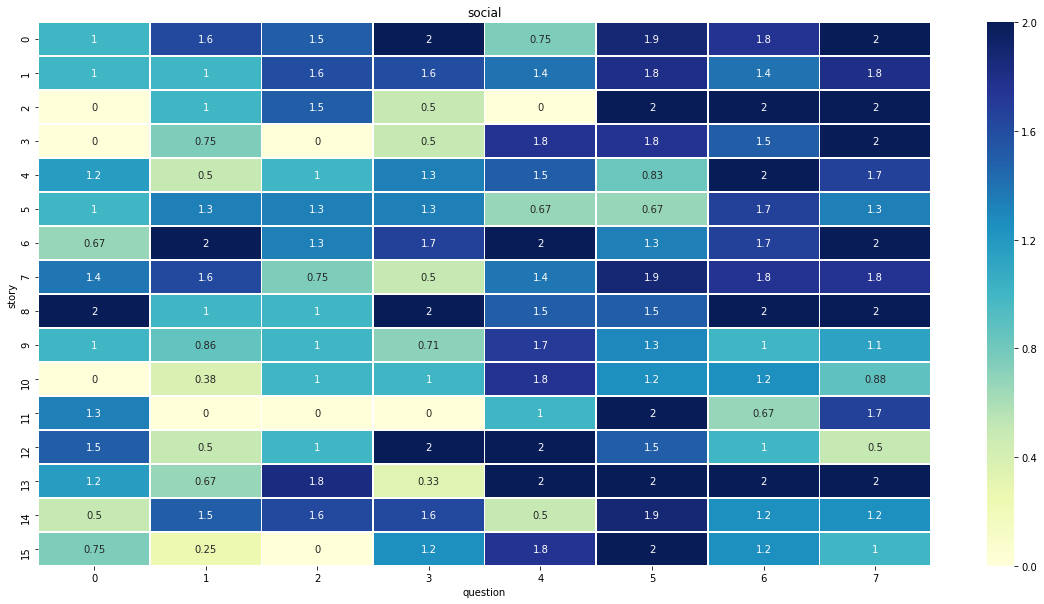

In [96]:
#plot the loc avg values in heatmaps
plt.figure(figsize = (20,10))

ax = sns.heatmap(soc_new_avg_q, linewidths=.5, cmap="YlGnBu", xticklabels=1, yticklabels=1, annot=True)
ax.set(xlabel='question', ylabel='story', title = "social")



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


[Text(114.0, 0.5, 'story'),
 Text(0.5, 24.0, 'question'),
 Text(0.5, 1.0, 'all average')]

<Figure size 432x288 with 0 Axes>

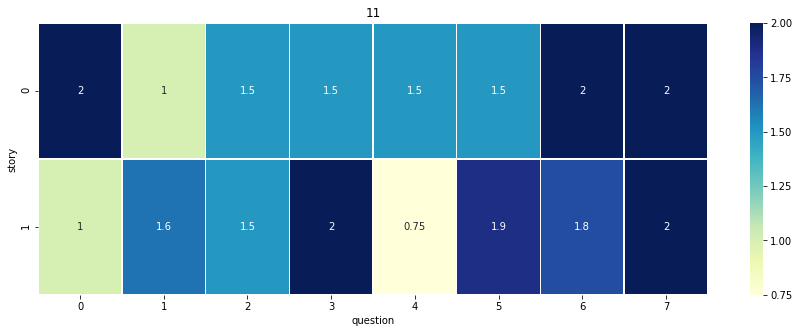

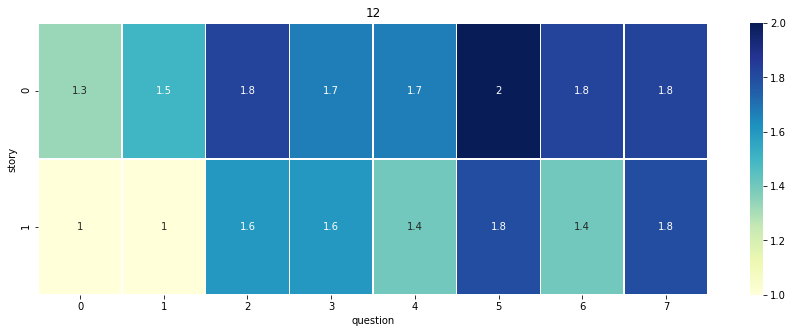

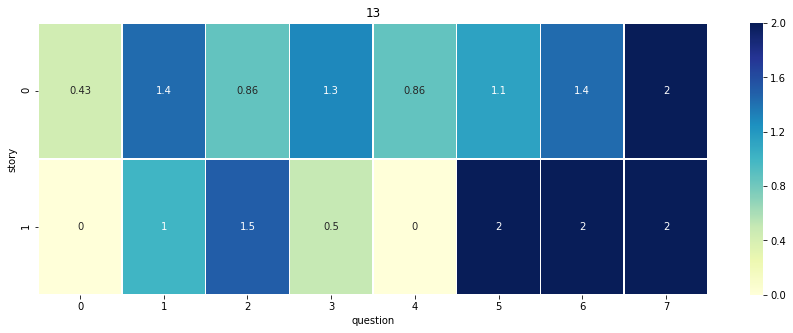

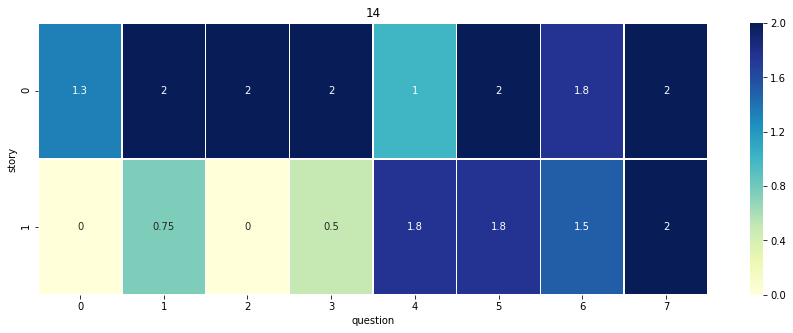

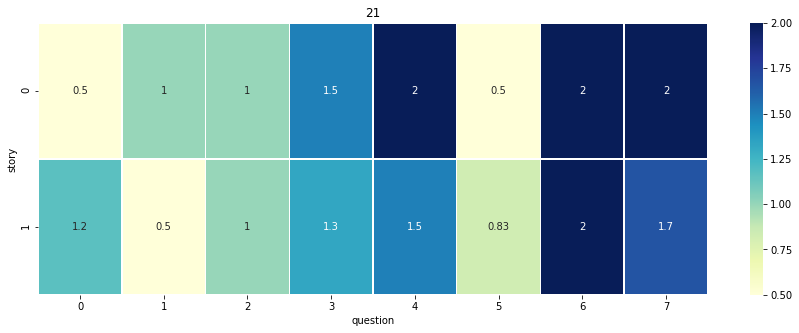

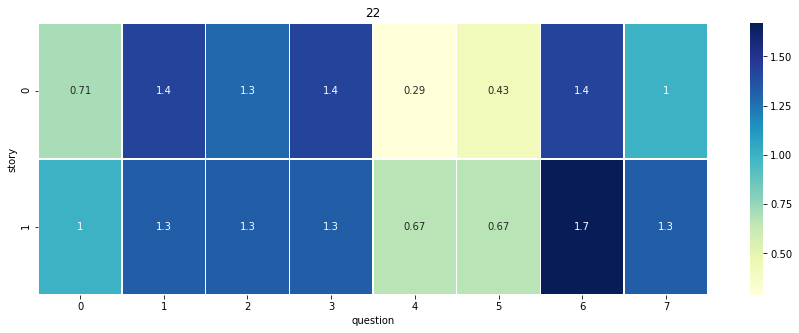

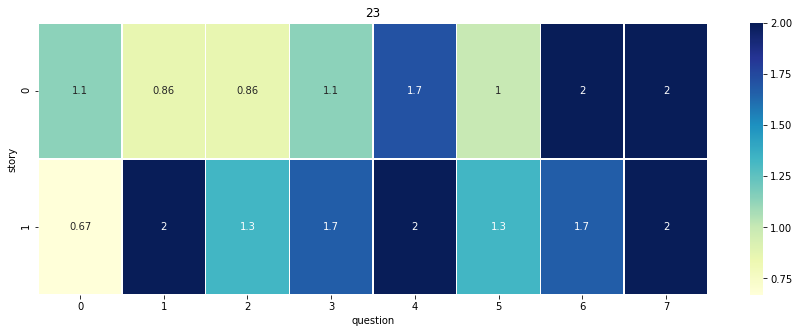

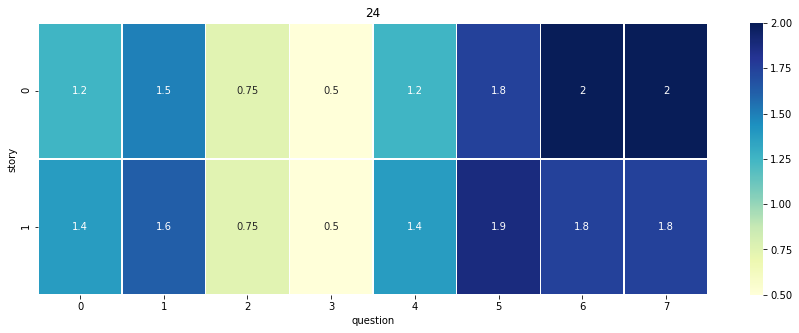

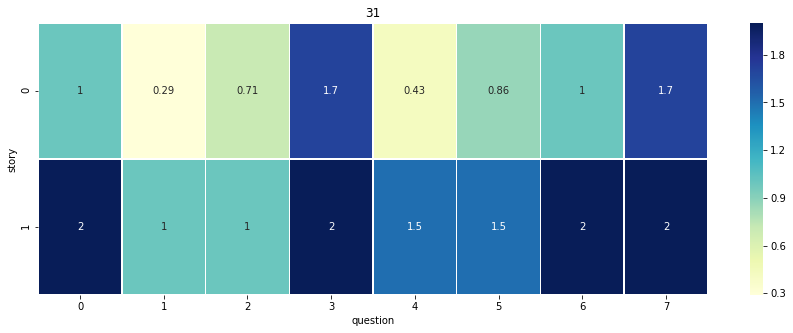

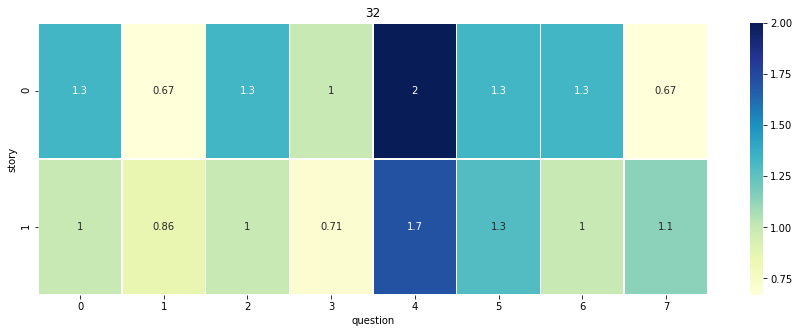

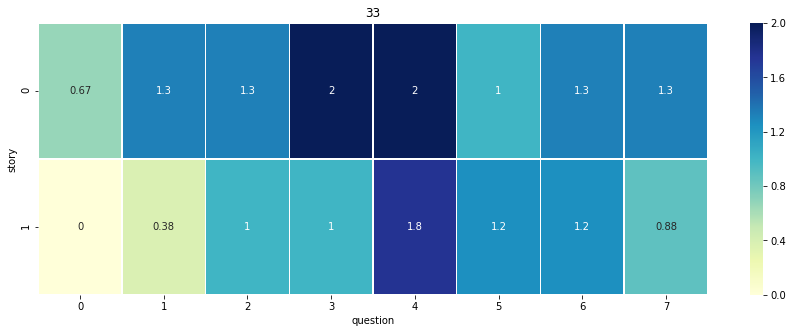

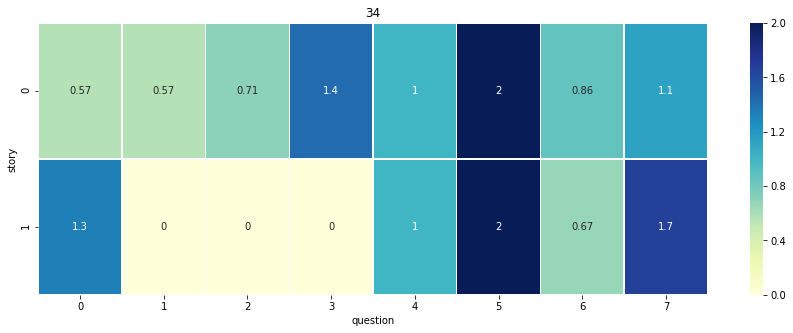

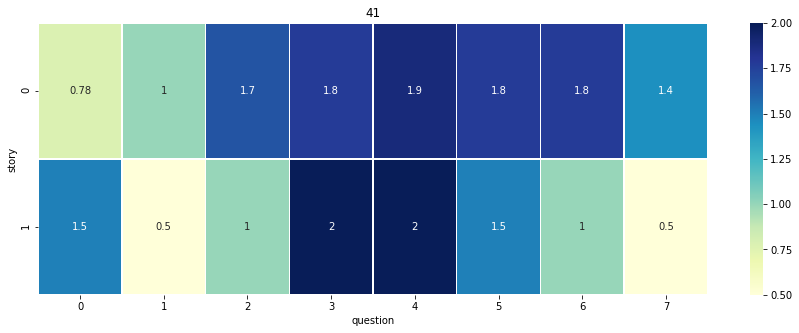

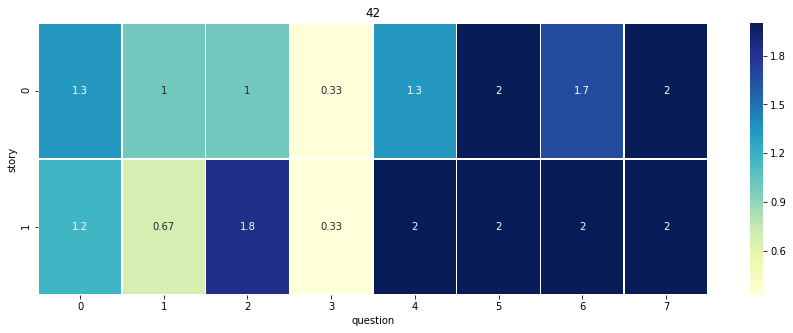

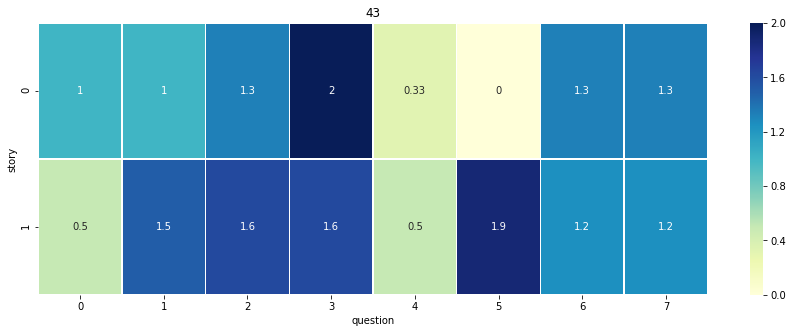

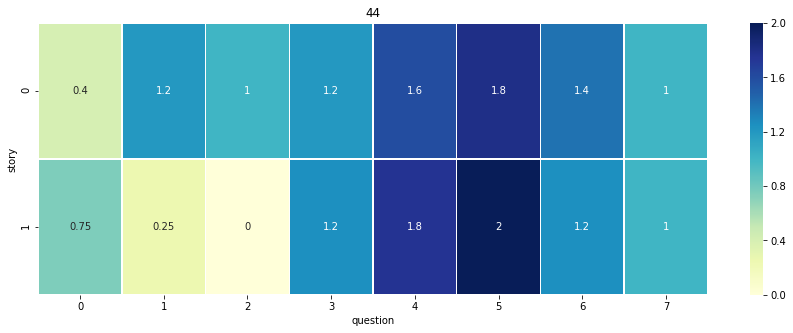

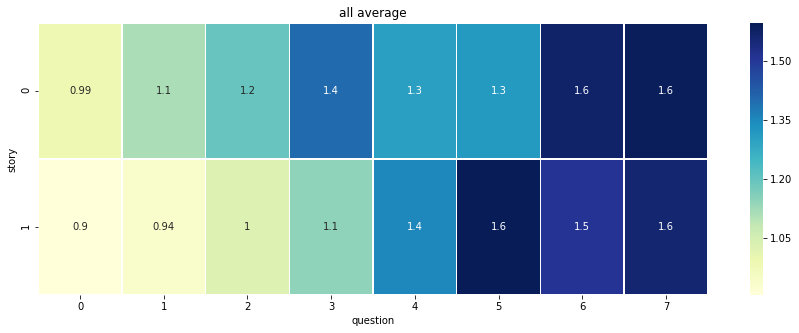

In [58]:
#plot the loc + soc avg recall scores for each story next to each other

avg_new = np.zeros((2, 8))
for i in range(1, 17):
    print(i)
    this_one = loc_avg_q[i,0]
    l = loc_avg_q[i, 1:9]
    s = soc_avg_q[i, 1:9]
    this_story = np.vstack((l, s))
    new = this_story.astype(np.float)
    fig = plt.figure(i)
    plt.figure(figsize = (15,5))
    ax = sns.heatmap(new, linewidths=.5, cmap="YlGnBu", xticklabels=1, yticklabels=1, annot=True)
    ax.set(xlabel='question', ylabel='story', title = this_one)
    fig.savefig('recall_avgs_figs/plot' + str(i) + '.png')
    avg_new += new/16
    

plt.figure(17)
plt.figure(figsize = (15,5))
ax = sns.heatmap(avg_new, linewidths=.5, cmap="YlGnBu", xticklabels=1, yticklabels=1, annot=True)
ax.set(xlabel='question', ylabel='story', title = 'all average')


In [116]:
print(this_story)

[['0.4' '1.2' '1.0' '1.2' '1.6' '1.8' '1.4' '1.0']
 ['0.75' '0.25' '0.0' '1.25' '1.75' '2.0' '1.25' '1.0']]
